In [1]:
import pandas as pd
import numpy as np
# importing  all the
# functions defined in functions.py
from utils import functions

In [2]:
X_train, X_test, y_train, y_test = functions.load_data()

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


rnd_reg = RandomForestRegressor(n_estimators=200,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_reg.fit(X_train, y_train)

y_pred = rnd_reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

C:\Users\Celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":


0.9076935861470522
0.0628770306033341


In [3]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('randomforestregressor', RandomForestRegressor())
])
pipe_params = {
    "randomforestregressor__n_estimators": [10,20,30,50,100],
    "randomforestregressor__max_leaf_nodes": [5,10,30,50,70],
    "randomforestregressor__max_depth": [5,7,10,15],
    "randomforestregressor__max_features": [1,2,3,4],
}


reg = GridSearchCV(estimator = pipe,
                  param_grid = pipe_params,
                  cv = 5)

reg.fit(X_train, y_train)

c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-pack

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [5, 7, 10, 15],
                         'randomforestregressor__max_features': [1, 2, 3, 4],
                         'randomforestregressor__max_leaf_nodes': [5, 10, 30,
                                                                   50, 70],
                         'randomforestregressor__n_estimators': [10, 20, 30, 50,
                                                                 100]})

In [7]:
print(reg.best_estimator_)
print(reg.best_score_)
print(reg.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=15, max_features=4,
                                       max_leaf_nodes=70, n_estimators=50))])
0.8405077500072318
{'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 4, 'randomforestregressor__max_leaf_nodes': 70, 'randomforestregressor__n_estimators': 50}


In [10]:
y_pred = reg.best_estimator_.predict(X_test)

In [11]:
reg.best_estimator_.score(X_test,y_test)

0.8788248912430898

In [12]:
df = pd.DataFrame(data=reg.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__max_features,param_randomforestregressor__max_leaf_nodes,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032693,0.009751,0.003787,0.001719,5,1,5,10,"{'randomforestregressor__max_depth': 5, 'rando...",0.248860,0.300851,0.241587,0.200484,0.318817,0.262120,0.042688,396
1,0.042535,0.005337,0.006777,0.001930,5,1,5,20,"{'randomforestregressor__max_depth': 5, 'rando...",0.242441,0.309541,0.227436,0.246444,0.316644,0.268501,0.037024,393
2,0.059767,0.010022,0.006380,0.002155,5,1,5,30,"{'randomforestregressor__max_depth': 5, 'rando...",0.234135,0.318987,0.211049,0.277456,0.321710,0.272667,0.044396,391
3,0.114794,0.020382,0.012958,0.008147,5,1,5,50,"{'randomforestregressor__max_depth': 5, 'rando...",0.259828,0.334070,0.223403,0.290873,0.320616,0.285758,0.040338,382
4,0.243932,0.044748,0.024914,0.010715,5,1,5,100,"{'randomforestregressor__max_depth': 5, 'rando...",0.263327,0.312524,0.237479,0.285677,0.320443,0.283890,0.030777,383


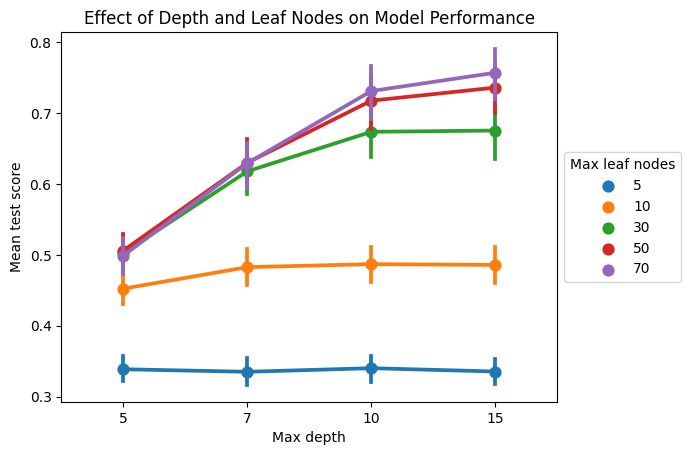

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_randomforestregressor__max_leaf_nodes',
                           'param_randomforestregressor__max_depth']],
             y='mean_test_score',x='param_randomforestregressor__max_depth',
             hue='param_randomforestregressor__max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Max leaf nodes')
plt.xlabel('Max depth')
plt.ylabel('Mean test score')
plt.savefig('resources/img/RF_performance.png')


In [18]:
functions.df_error(y_pred, y_test, 'error_randomforest.csv')

,Metric,Error
0,MAE,0.468873
1,MAPE,0.032526
2,MSE,0.600453
3,RMSE,0.774889


In [15]:
import pickle

# save the model to disk
best_model = reg.best_estimator_
filename = 'model/model_randomforest'
pickle.dump(best_model, open(filename, 'wb'))

In [19]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor


pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('dectree', DecisionTreeRegressor())
])

pipe_params = {
    "dectree__min_samples_split": [10,20,40],
    "dectree__max_depth": [2,6,8],
    "dectree__min_samples_leaf": [20,40,100],
    "dectree__max_leaf_nodes": [5,20,100],
}


dec_tree = GridSearchCV(estimator = pipe,
                  param_grid = pipe_params,
                  cv = 5)

dec_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dectree', DecisionTreeRegressor())]),
             param_grid={'dectree__max_depth': [2, 6, 8],
                         'dectree__max_leaf_nodes': [5, 20, 100],
                         'dectree__min_samples_leaf': [20, 40, 100],
                         'dectree__min_samples_split': [10, 20, 40]})

In [20]:
print(dec_tree.best_estimator_)
print(dec_tree.best_score_)
print(dec_tree.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dectree',
                 DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100,
                                       min_samples_leaf=20,
                                       min_samples_split=10))])
0.4375828529076699
{'dectree__max_depth': 8, 'dectree__max_leaf_nodes': 100, 'dectree__min_samples_leaf': 20, 'dectree__min_samples_split': 10}


In [21]:
import pickle

# save the model to disk
filename = 'model/model_decisiontree'
pickle.dump(dec_tree.best_estimator_, open(filename, 'wb'))

In [22]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=100,
                            random_state=42)
ada_reg.fit(X_train, y_train)

y_pred_ada_reg = ada_reg.predict(X_train)
print(mean_absolute_error(y_train, y_pred_ada_reg))

ada_reg.score(X_train,y_train)

1.22780023012306


c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5674943735244569

In [ ]:
# save the model to disk
filename = 'model/model_adaboost'
pickle.dump(dec_tree.best_estimator_, open(filename, 'wb'))

In [75]:
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)

In [78]:
#Probamos SVM

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=0.5, random_state=42)
svm_reg.fit(X_train_scal, y_train)

c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(epsilon=0.5, random_state=42)